## Assignment: CIFAR-100 Image Classification
Your task is to apply the concepts and techniques learned in this Fashion-MNIST project to the CIFAR-100 dataset. CIFAR-100 is a dataset consisting of 60,000 32x32 color images in 100 classes, with 600 images per class. There are 50,000 training images and 10,000 test images.

In [47]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

import plotly.graph_objects as go
from plotly.subplots import make_subplots

1.  **Dataset Setup:**
    *   Load the CIFAR-100 dataset.
    *   Preprocess the data (normalize pixel values, one-hot encode labels). Remember that CIFAR-100 images are 32x32 color images, so the input shape will be different from Fashion-MNIST.
    *   Verify the shapes of the processed data.

In [48]:
# 1. Load the CIFAR-100 dataset
print("Loading CIFAR-100 dataset...")
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar100.load_data()

Loading CIFAR-100 dataset...


In [49]:
print(f"Training data shape: {x_train.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Test data shape: {x_test.shape}")
print(f"Test labels shape: {y_test.shape}")

Training data shape: (50000, 32, 32, 3)
Training labels shape: (50000, 1)
Test data shape: (10000, 32, 32, 3)
Test labels shape: (10000, 1)


In [50]:

print(f"\nData types:")
print(f"Images: {x_train.dtype}")
print(f"Labels: {y_train.dtype}")
print(f"Pixel value range: {x_train.min()} - {x_train.max()}")


Data types:
Images: uint8
Labels: int64
Pixel value range: 0 - 255


array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [195, 205, 193],
        [212, 224, 204],
        [182, 194, 167]],

       [[255, 255, 255],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [170, 176, 150],
        [161, 168, 130],
        [146, 154, 113]],

       [[255, 255, 255],
        [254, 254, 254],
        [255, 255, 255],
        ...,
        [189, 199, 169],
        [166, 178, 130],
        [121, 133,  87]],

       ...,

       [[148, 185,  79],
        [142, 182,  57],
        [140, 179,  60],
        ...,
        [ 30,  17,   1],
        [ 65,  62,  15],
        [ 76,  77,  20]],

       [[122, 157,  66],
        [120, 155,  58],
        [126, 160,  71],
        ...,
        [ 22,  16,   3],
        [ 97, 112,  56],
        [141, 161,  87]],

       [[ 87, 122,  41],
        [ 88, 122,  39],
        [101, 134,  56],
        ...,
        [ 34,  36,  10],
        [105, 133,  59],
        [138, 173,  79]]], dtype=uint8)
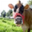

In [51]:
x_train[0]

# Pre-processing

# Normalizing :

since every pixel ranges from 0 to 255 - we normalize by 255.

squeeze the details without losing context.

In [52]:
print("Normalizing pixel values...")
x_train_normalized = x_train.astype('float32') / 255.0
x_test_normalized = x_test.astype('float32') / 255.0

print(f"Normalized pixel value range: {x_train_normalized.min()} - {x_train_normalized.max()}")


Normalizing pixel values...
Normalized pixel value range: 0.0 - 1.0


#One-Hot Encoding vs num_classes





In [53]:
num_classes = 100
y_train_onehot = keras.utils.to_categorical(y_train, num_classes)
y_test_onehot = keras.utils.to_categorical(y_test, num_classes)

In [54]:
y_train_onehot[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [55]:
y_train.shape

(50000, 1)

In [56]:
y_train_onehot.shape

(50000, 100)

In [57]:
print(f"x_train_normalized: {x_train_normalized.shape}")
print(f"y_train_onehot: {y_train_onehot.shape}")
print(f"x_test_normalized: {x_test_normalized.shape}")
print(f"y_test_onehot: {y_test_onehot.shape}")

x_train_normalized: (50000, 32, 32, 3)
y_train_onehot: (50000, 100)
x_test_normalized: (10000, 32, 32, 3)
y_test_onehot: (10000, 100)


2.  **Model Building:**
    *   Adapt the ANN and CNN model architectures for the CIFAR-100 dataset. Consider that CIFAR-100 images are color (3 channels) and have a different resolution (32x32). You might need to adjust the input layer and potentially the number of filters or layers in the CNNs for better performance on a more complex dataset.

- **Flatten (32×32x3 → 3072)** → 0 params  
- **Dense (512, ReLU)** → 15,73,376 params  
- **Dense (256, ReLU)** → 1,31,328 params  
- **Dense (100, Softmax)** → 25700 params  

**Total params:** ~109K  

In [58]:
ann_model = keras.Sequential([
        # Flatten the 32x32x3 image into a 1D vector of 3072 pixels
        keras.layers.Flatten(input_shape=(32, 32, 3)),

        # Hidden Dense layers
        keras.layers.Dense(512, activation='relu'),
        keras.layers.Dense(256, activation='relu'),

        # Output layer with 100 units for 100 classes
        keras.layers.Dense(100, activation='softmax')
    ])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [59]:
ann_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

In [60]:
ann_model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_4 (Flatten)             │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 100)            │        25,700 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,730,404 (6.60 MB)

 Trainable params: 1,730,404 (6.60 MB)

 Non-trainable params: 0 (0.00 B)

# Building a CNN Model

In [61]:
from keras import layers

In [73]:
#basic cnn model
basic_cnn_model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(100, activation='softmax')
])


basic_cnn_model.compile(optimizer='adam',
                        loss='categorical_crossentropy',
                        metrics=['accuracy'])

basic_cnn_model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_14 (Conv2D)              │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 64)             │       147,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 100)            │         6,500 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 173,412 (677.39 KB)

 Trainable params: 173,412 (677.39 KB)

 Non-trainable params: 0 (0.00 B)

In [63]:
deeper_cnn_model = keras.Sequential([

        layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
        layers.BatchNormalization(),
        layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),

        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),

        layers.Flatten(),
        layers.Dense(512, activation='relu'),
        layers.Dropout(0.5),

        # Output layer with 100 units
        layers.Dense(100, activation='softmax')
    ])

In [64]:
deeper_cnn_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

* Optimizer (optimizer='adam'): The optimizer is an algorithm used to update the model's weights during training to minimize the loss.

* Loss Function (loss='categorical_crossentropy'): The loss function measures how well the model is performing. We use categorical cross-entropy because we have a multi-class classification problem (100 classes) and our labels are one-hot encoded. The goal of the optimizer is to minimize this loss.

* Metrics (metrics=['accuracy']): Metrics are used to monitor the training and testing steps. Accuracy is a common metric that simply measures the proportion of correct predictions.

In [65]:
deeper_cnn_model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 512)            │     2,097,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 100)            │        51,300 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,214,916 (8.45 MB)

 Trainable params: 2,214,724 (8.45 MB)

 Non-trainable params: 192 (768.00 B)

 * **Conv2D** --> Conv2D layer applies a set of learnable filters (also called kernels) to the input image. Each filter slides over the image, performing a dot product with the input data it's currently on, and creates a feature map

  * **MaxPooling2D** --> MaxPooling2D layer is used for downsampling the feature maps produced by the convolutional layers. It works by taking a small window (e.g., 2x2 pixels) and extracting the maximum value within that window. This does two important things.

  * **Batch Normalization** --> Batch normalization is a technique used to stabilize and accelerate the training of deep neural networks. It normalizes the activations of the previous layer for each batch, effectively setting the mean activation to 0 and the standard deviation to 1.

  * **Dropout** --> Dropout is a regularization technique that helps prevent overfitting. During training, a dropout layer randomly "drops out" (sets to zero) a certain percentage of neurons in a layer.

  * **Flatten Layer** --> The convolutional and pooling layers output 3D feature maps (e.g., height x width x channels). However, a standard `Dense` layer requires a 1D vector as input. The `Flatten` layer simply takes the 3D output and transforms it into a 1D array of a single long vector.
  
  * **Dense Layers** --> Every Dense layer is FC layer. After the CNN has extracted features from the image, the `Dense` layers use these features to perform the final classification. The `Dense` layers learn to weigh the features to make a final prediction. The final `Dense` layer, with its `softmax` activation, outputs the probabilities for each of the 100 classes.


3.  **Model Training:**
    *   Train the models using the preprocessed CIFAR-100 training data. Use Early Stopping and Model Checkpointing as implemented before.


# Defining model checkpoints

In [66]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [67]:
# Define the callbacks
early_stopping = EarlyStopping(monitor='val_loss',
                               patience=10,
                               restore_best_weights=True)

In [68]:
model_checkpoint_ann = ModelCheckpoint(filepath='best_ann_model_weights.weights.h5',
                                     monitor='val_accuracy',
                                     save_best_only=True,
                                     save_weights_only=True,
                                     mode='max',
                                     verbose=1)

model_checkpoint_cnn = ModelCheckpoint(filepath='best_cnn_model_weights.weights.h5',
                                     monitor='val_accuracy',
                                     save_best_only=True,
                                     save_weights_only=True,
                                     mode='max',
                                     verbose=1)

model_checkpoint_deeper_cnn = ModelCheckpoint(filepath='best_deeper_cnn_model_weights.weights.h5',
                                     monitor='val_accuracy',
                                     save_best_only=True,
                                     save_weights_only=True,
                                     mode='max',
                                     verbose=1)

# Train the model

In [69]:
print("Training the ANN Model...")

ann_history = ann_model.fit(
    x_train_normalized,
    y_train_onehot,
    epochs=30,
    batch_size=64,
    validation_data=(x_test_normalized, y_test_onehot),
    callbacks=[model_checkpoint_ann]
)

Training the ANN Model...
Epoch 1/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0427 - loss: 4.3666
Epoch 1: val_accuracy improved from -inf to 0.11630, saving model to best_ann_model_weights.weights.h5
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.0427 - loss: 4.3664 - val_accuracy: 0.1163 - val_loss: 3.8383
Epoch 2/30
777/782 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1243 - loss: 3.7654
Epoch 2: val_accuracy improved from 0.11630 to 0.14670, saving model to best_ann_model_weights.weights.h5
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.1244 - loss: 3.7650 - val_accuracy: 0.1467 - val_loss: 3.6697
Epoch 3/30
768/782 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1578 - loss: 3.5621
Epoch 3: val_accuracy improved from 0.14670 to 0.15540, saving model to best_ann_model_weights.weights.h5
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.1579 - loss: 3.5618 - val_accuracy: 0.1554 - val_loss: 3.6027
Epoch 4/30
763/782 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/ste

# Train Basic CNN Model

In [78]:
print("Training Basic CNN model...")
basic_cnn_history = basic_cnn_model.fit(
    x_train_normalized,
    y_train_onehot,
    epochs=30,
    batch_size=64,
    validation_data=(x_test_normalized, y_test_onehot),
    callbacks=[model_checkpoint_cnn,early_stopping]
)
print("Basic CNN model training finished.")

Training Basic CNN model...
Epoch 1/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4270 - loss: 2.1996
Epoch 1: val_accuracy improved from -inf to 0.34840, saving model to best_cnn_model_weights.weights.h5
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.4270 - loss: 2.1996 - val_accuracy: 0.3484 - val_loss: 2.6233
Epoch 2/30
771/782 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4284 - loss: 2.1712
Epoch 2: val_accuracy did not improve from 0.34840
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.4284 - loss: 2.1715 - val_accuracy: 0.3394 - val_loss: 2.6497
Epoch 3/30
771/782 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4347 - loss: 2.1476
Epoch 3: val_accuracy did not improve from 0.34840
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.4346 - loss: 2.1479 - val_accuracy: 0.3453 - val_loss: 2.6262
Epoch 4/30
769/782 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4351 - loss: 2.1292
Epoch 4: val_accuracy improved from 0.34840 to 0.35350, saving model to 

# Train Deeper CNN Model

In [79]:
print("Training Deeper CNN model...")
deeper_cnn_history = deeper_cnn_model.fit(
    x_train_normalized,
    y_train_onehot,
    epochs=30,
    batch_size=64,
    validation_data=(x_test_normalized, y_test_onehot),
    callbacks=[early_stopping, model_checkpoint_deeper_cnn]
)
print("Deeper CNN model training finished.")

Training Deeper CNN model...
Epoch 1/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6508 - loss: 1.1989
Epoch 1: val_accuracy did not improve from 0.48980
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.6508 - loss: 1.1989 - val_accuracy: 0.4782 - val_loss: 2.0774
Epoch 2/30
778/782 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6601 - loss: 1.1553
Epoch 2: val_accuracy improved from 0.48980 to 0.49000, saving model to best_deeper_cnn_model_weights.weights.h5
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.6601 - loss: 1.1555 - val_accuracy: 0.4900 - val_loss: 2.0513
Epoch 3/30
775/782 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6674 - loss: 1.1243
Epoch 3: val_accuracy did not improve from 0.49000
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.6673 - loss: 1.1246 - val_accuracy: 0.4873 - val_loss: 2.0622
Epoch 4/30
775/782 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6761 - loss: 1.1037
Epoch 4: val_accuracy did not improve from 0.49000
782/782 ━━

In [80]:
deeper_cnn_history

4.  **Model Evaluation:**
    *   Evaluate the trained models on the CIFAR-100 test set. Compare their performance using loss and accuracy.
    *   Visualize training history and confusion matrices.



Import utilities → Load weights (ANN, Deeper CNN) → Evaluate on test set → Get loss & accuracy → Print results

In [86]:
loss_cnn

2.6441547870635986

In [87]:
loss_ann

3.4202325344085693

Successfully loaded weights for the ANN model.
ANN Model Test Loss: 3.4202
ANN Model Test Accuracy: 0.2331
Successfully loaded weights for the Basic CNN model.
Basic CNN Model Test Loss: 2.6442
Basic CNN Model Test Accuracy: 0.3579
Successfully loaded weights for the Deeper CNN model.
Deeper CNN Model Test Loss: 2.0926
Deeper CNN Model Test Accuracy: 0.4978


/tmp/ipython-input-3596514882.py:110: UserWarning:

Glyph 10024 (\N{SPARKLES}) missing from font(s) DejaVu Sans.

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 10024 (\N{SPARKLES}) missing from font(s) DejaVu Sans.



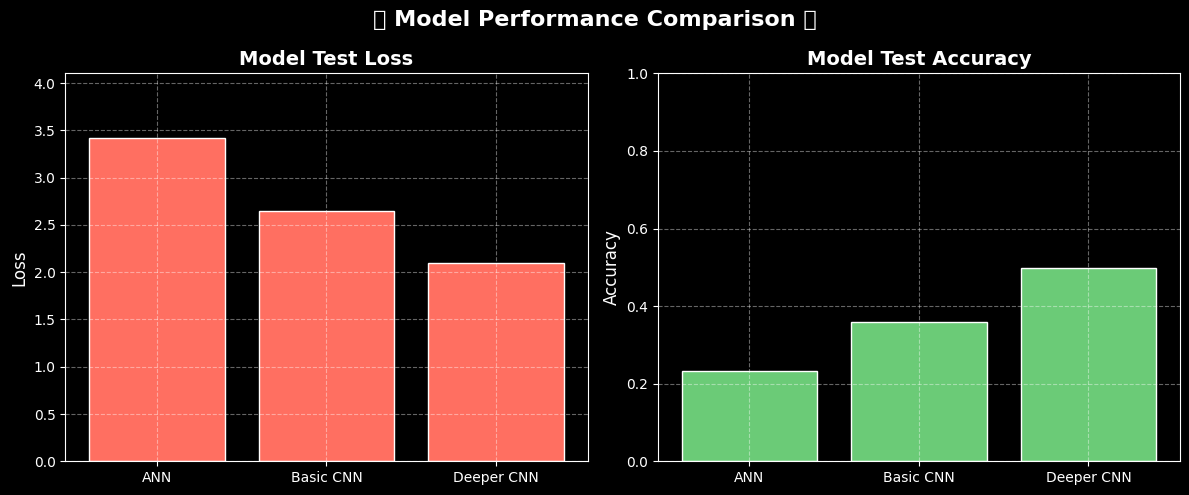

In [89]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

# Initialize lists to store performance metrics
models = []
losses = []
accuracies = []

# Evaluate ANN model
try:
    ann_model.load_weights('/content/best_ann_model_weights.weights.h5')
    print("Successfully loaded weights for the ANN model.")
    loss_ann, accuracy_ann = ann_model.evaluate(x_test_normalized, y_test_onehot, verbose=0)
    print(f"ANN Model Test Loss: {loss_ann:.4f}")
    print(f"ANN Model Test Accuracy: {accuracy_ann:.4f}")
    models.append('ANN')
    losses.append(loss_ann)
    accuracies.append(accuracy_ann)
except Exception as e:
    print(f"Could not evaluate ANN model (error loading weights or evaluation): {e}")


# Evaluate Basic CNN model
try:
    basic_cnn_model.load_weights('/content/best_cnn_model_weights.weights.h5')
    print("Successfully loaded weights for the Basic CNN model.")
    loss_cnn, accuracy_cnn = basic_cnn_model.evaluate(x_test_normalized, y_test_onehot, verbose=0)
    print(f"Basic CNN Model Test Loss: {loss_cnn:.4f}")
    print(f"Basic CNN Model Test Accuracy: {accuracy_cnn:.4f}")
    models.append('Basic CNN')
    losses.append(loss_cnn)
    accuracies.append(accuracy_cnn)
except Exception as e:
    print(f"Could not evaluate Basic CNN model (error loading weights or evaluation): {e}")


# Evaluate Deeper CNN model
try:
    # Attempt to load the best weights if available, otherwise use current model state
    deeper_cnn_model.load_weights('/content/best_deeper_cnn_model_weights.weights.h5')
    print("Successfully loaded weights for the Deeper CNN model.")
    loss_deeper_cnn, accuracy_deeper_cnn = deeper_cnn_model.evaluate(x_test_normalized, y_test_onehot, verbose=0)
    print(f"Deeper CNN Model Test Loss: {loss_deeper_cnn:.4f}")
    print(f"Deeper CNN Model Test Accuracy: {accuracy_deeper_cnn:.4f}")
    models.append('Deeper CNN')
    losses.append(loss_deeper_cnn)
    accuracies.append(accuracy_deeper_cnn)
except Exception as e:
    print(f"Could not evaluate Deeper CNN model (error loading weights or evaluation): {e}")

# --- Plotting ---
if len(models) > 0: # Only plot if at least one model was evaluated
    # Dark mode style
    plt.style.use("dark_background")

    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # Loss plot
    axes[0].bar(models, losses, color='#FF6F61', edgecolor='white')
    axes[0].set_title('Model Test Loss', fontsize=14, fontweight='bold')
    axes[0].set_ylabel('Loss', fontsize=12)
    axes[0].grid(True, linestyle='--', alpha=0.4)
    axes[0].set_ylim(0, max(losses) * 1.2 if max(losses) > 0 else 1.0) # Adjust y-limit for better visualization

    # Accuracy plot
    axes[1].bar(models, accuracies, color='#6BCB77', edgecolor='white')
    axes[1].set_title('Model Test Accuracy', fontsize=14, fontweight='bold')
    axes[1].set_ylabel('Accuracy', fontsize=12)
    axes[1].grid(True, linestyle='--', alpha=0.4)
    axes[1].set_ylim(0, 1.0) # Accuracy is between 0 and 1

    # Overall title
    plt.suptitle("✨ Model Performance Comparison ✨", fontsize=16, fontweight='bold')

    plt.tight_layout()
    plt.show()
else:
    print("No models were successfully evaluated to plot.")

5.  **Prediction Analysis:**
    *   Choose the best performing model and analyze its predictions on the CIFAR-100 test set.


#### Model Comparison

- Created a dataframe to store **test loss** and **test accuracy** for ANN, Basic CNN, and Deeper CNN.  
- Plotted training history for each model (accuracy & loss vs. epochs).  
- Helps compare how models learn and generalize over time.  

In [93]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

models = {
    "ANN": ("cyan", ann_history),
    "Basic CNN": ("magenta", basic_cnn_history),
    "Deeper CNN": ("yellow", deeper_cnn_history)
}

performance_data = {
    'Model': ['ANN', 'Basic CNN', 'Deeper CNN'],
    'Test Loss': [loss_ann, loss_cnn, loss_deeper_cnn],
    'Test Accuracy': [accuracy_ann, accuracy_cnn, accuracy_deeper_cnn]
}

performance_df = pd.DataFrame(performance_data)

fig = make_subplots(rows=1, cols=2, subplot_titles=('Accuracy', 'Loss'))

for name, (color, history) in models.items():
    # Accuracy
    fig.add_trace(go.Scatter(y=history.history['accuracy'], mode='lines',
                             name=name, line=dict(color=color, dash='solid')), row=1, col=1)
    fig.add_trace(go.Scatter(y=history.history['val_accuracy'], mode='lines',
                             name=name, line=dict(color=color, dash='dot'), showlegend=False), row=1, col=1)

    # Loss
    fig.add_trace(go.Scatter(y=history.history['loss'], mode='lines',
                             name=name, line=dict(color=color, dash='solid')), row=1, col=2)
    fig.add_trace(go.Scatter(y=history.history['val_loss'], mode='lines',
                             name=name, line=dict(color=color, dash='dot'), showlegend=False), row=1, col=2)

fig.update_layout(
    title_text="Model Comparison: Accuracy & Loss (Train=Solid, Val=Dot)",
    height=500,
    width=1200,
    template="plotly_dark"
)

fig.show()

### Prediction Analysis for Deeper CNN Model

Now that we have evaluated the Deeper CNN model, let's analyze its predictions on the test set to get a better understanding of its performance beyond just overall accuracy. We will look at the classification report and visualize some predictions.

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
Classification Report for Deeper CNN Model:
              precision    recall  f1-score   support

           0       0.82      0.72      0.77       100
           1       0.59      0.55      0.57       100
           2       0.36      0.43      0.39       100
           3       0.27      0.20      0.23       100
           4       0.28      0.36      0.32       100
           5       0.43      0.43      0.43       100
           6       0.55      0.57      0.56       100
           7       0.50      0.51      0.51       100
           8       0.70      0.64      0.67       100
           9       0.71      0.67      0.69       100
          10       0.43      0.33      0.38       100
          11       0.37      0.28      0.32       100
          12       0.54      0.48      0.51       100
          13       0.42      0.35      0.38       100
          14       0.44      0.42      0.43       100
          15       0.51      0.48      0.49       

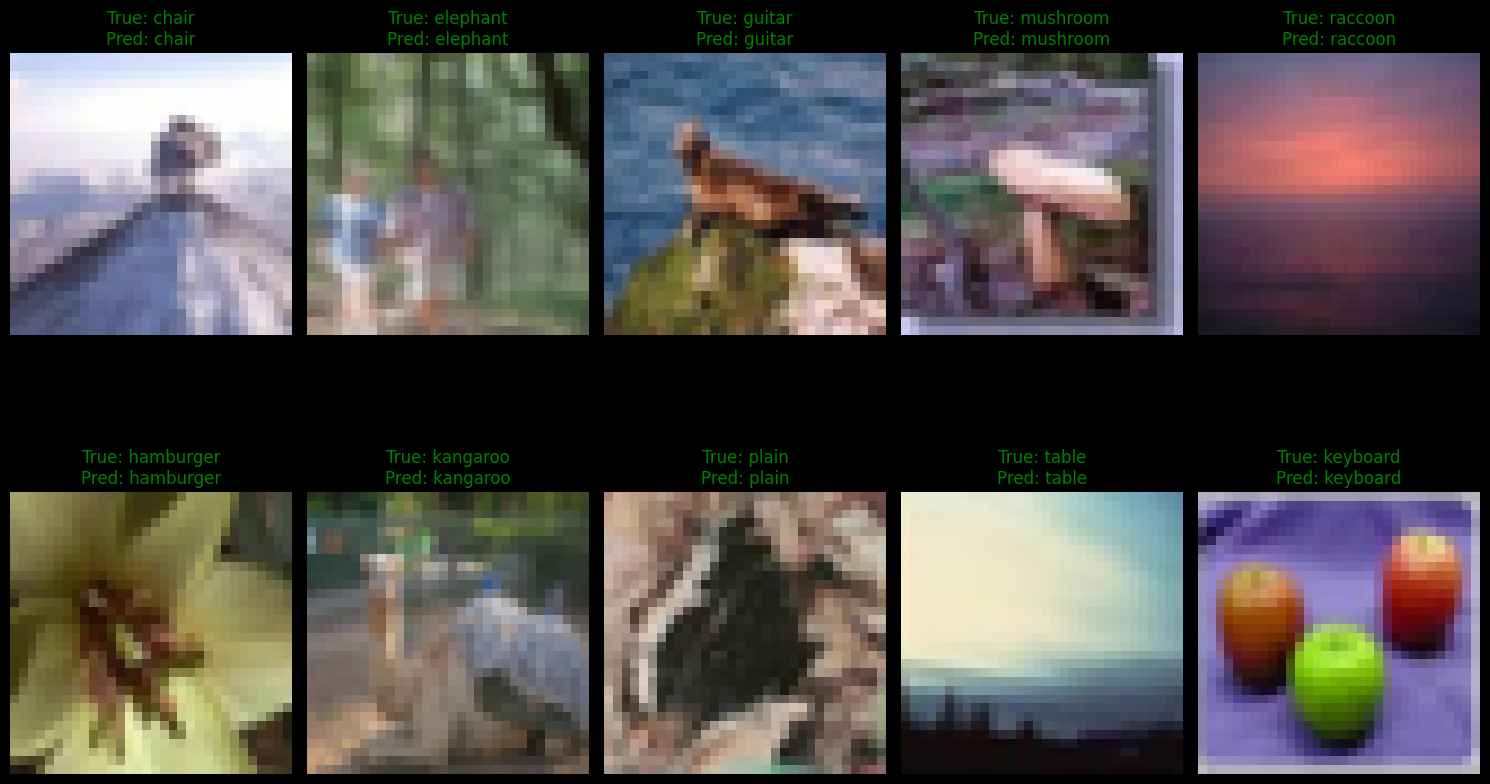


Incorrect Predictions:


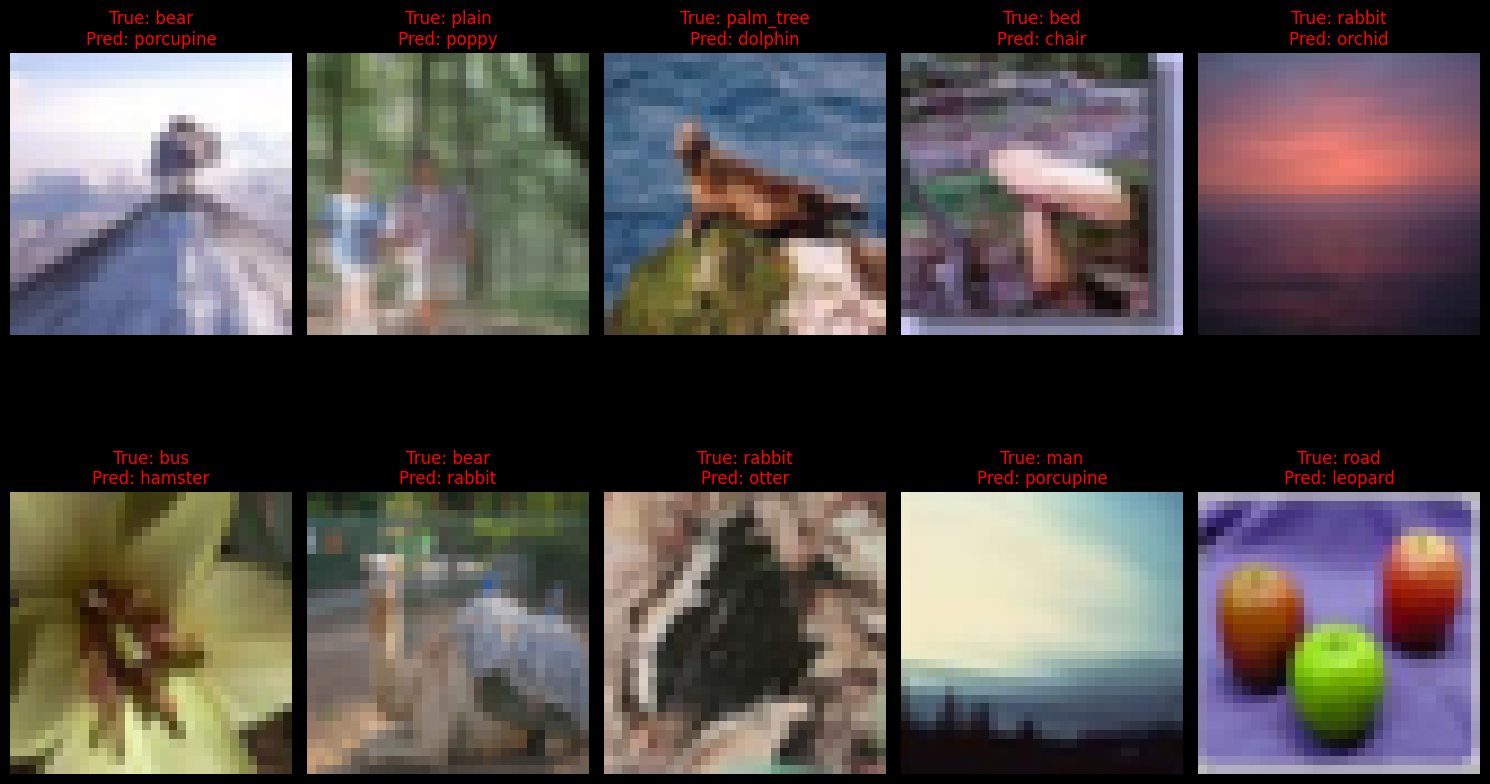

In [91]:
# Get predictions from the Deeper CNN model on the test set
y_pred_onehot = deeper_cnn_model.predict(x_test_normalized)

# Convert predictions from one-hot encoded to class indices
y_pred_classes = np.argmax(y_pred_onehot, axis=1)
y_true_classes = np.argmax(y_test_onehot, axis=1) # Convert true labels to class indices

# Generate Classification Report
print("Classification Report for Deeper CNN Model:")
print(classification_report(y_true_classes, y_pred_classes))

# Generate Confusion Matrix
# Note: For 100 classes, the confusion matrix will be very large.
# We can visualize a sample or a heatmap of a subset if needed.
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)
print("Confusion Matrix Shape:", conf_matrix.shape)

# Display some sample test images with predictions
cifar100_labels = [
    'apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle',
    'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel',
    'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock',
    'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur',
    'dolphin', 'elephant', 'fern', 'finch', 'forest', 'fox', 'garden_shrub',
    'garden_tools', 'girl', 'gloves', 'goat', 'goldfish', 'grass', 'guitar',
    'hamburger', 'hamster', 'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower',
    'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle',
    'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter',
    'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy',
    'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose',
    'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake',
    'spider', 'squirrel', 'stockings', 'sunflower', 'sweet_pepper', 'table',
    'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout',
    'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman',
    'worm'
] # CIFAR-100 coarse labels are different, these are the fine-grained labels


# Function to display images with predictions
def plot_predictions(images, true_labels, predicted_labels, label_names, num_images=10):
    plt.figure(figsize=(15, 10))
    for i in range(num_images):
        plt.subplot(2, 5, i + 1)
        plt.imshow(images[i])
        true_label = label_names[true_labels[i]]
        predicted_label = label_names[predicted_labels[i]]
        color = 'green' if true_labels[i] == predicted_labels[i] else 'red'
        plt.title(f"True: {true_label}\nPred: {predicted_label}", color=color)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Display a few correct and incorrect predictions
print("\nSample Test Images with Predictions:")

# Find indices of correctly and incorrectly predicted images
correct_indices = np.where(y_true_classes == y_pred_classes)[0]
incorrect_indices = np.where(y_true_classes != y_pred_classes)[0]

# Display some correct predictions
print("\nCorrect Predictions:")
if len(correct_indices) > 10:
    sample_correct_indices = np.random.choice(correct_indices, 10, replace=False)
else:
    sample_correct_indices = correct_indices
plot_predictions(x_test, y_true_classes[sample_correct_indices], y_pred_classes[sample_correct_indices], cifar100_labels, num_images=len(sample_correct_indices))

# Display some incorrect predictions
print("\nIncorrect Predictions:")
if len(incorrect_indices) > 10:
    sample_incorrect_indices = np.random.choice(incorrect_indices, 10, replace=False)
else:
    sample_incorrect_indices = incorrect_indices
plot_predictions(x_test, y_true_classes[sample_incorrect_indices], y_pred_classes[sample_incorrect_indices], cifar100_labels, num_images=len(sample_incorrect_indices))

**Reasoning**:
The task is to load the data and display the first few rows to understand its structure.

